In [1]:
import nptorch as nt 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
X,y = datasets.make_regression(
    n_samples=100000,
    n_features=32,
    n_informative=10,
    n_targets=16,
    bias=0.0,
    effective_rank=None,
    tail_strength=0.5,
    noise=0.0,
    shuffle=True,
    coef=False,
    random_state=None,
)
print("X shape:",X.shape,"\ny shape:",y.shape)

std = StandardScaler()
X = std.fit_transform(X)
y = std.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
print("X_train shape:",X_train.shape,"\ny_train shape:",y_train.shape)
print("X_test shape:",X_test.shape,"\ny_test shape:",y_test.shape)

X shape: (100000, 32) 
y shape: (100000, 16)
X_train shape: (75000, 32) 
y_train shape: (75000, 16)
X_test shape: (25000, 32) 
y_test shape: (25000, 16)


In [3]:
model = nt.Sequential([
    # nt.Dropout(),
    nt.Linear(32,128),
    nt.ReLU(),
    nt.Dropout(),
    nt.Linear(128,16)
])

mse = nt.MSELoss()

In [4]:
n_epochs = 100000
batch_size = 32
lr = 0.001
update_epoch = n_epochs // 100
pbar = tqdm(range(n_epochs), unit=" Epochs", miniters=update_epoch)
loss_array=[]
for epoch in pbar:
    idx = np.random.randint(0,len(X_train),(batch_size,))
    y_pred=model(X_train[idx])
    loss=mse(y_pred,y_train[idx])
    loss.zero_grad()
    loss.backward()
    for params in model.parameters():
        params.data -= lr*params.grad
    if (epoch+1) % update_epoch == 0:
        pbar.set_description(f"Mini Batch Loss={loss.data:.4f}")
    loss_array.append(loss.data)
model.train_mode(False)
y_pred = model(X_test)
loss = mse(y_pred,y_test)
print(f"Test Loss : {loss.data:.6f}")
model.train_mode(True)

  0%|          | 0/100000 [00:00<?, ? Epochs/s]

Test Loss : 0.032891


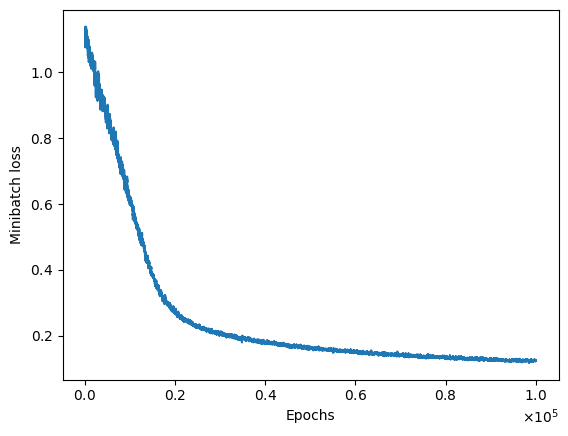

In [5]:
import pandas as pd
pd.Series(loss_array)\
    .rolling(100).mean().dropna()\
    .plot(
        xlabel="Epochs",
        ylabel="Minibatch loss",
    ).ticklabel_format(
        axis='both', 
        style='sci',
        scilimits=(0,0),
        useMathText=True,
    )
plt.show()